<a href="https://colab.research.google.com/github/HamzaRabbani011/PRODIGY_ML_02/blob/main/TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('Mall_Customers.csv')

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
# Select relevant features for clustering
selected_features = ['Annual Income (k$)']

In [10]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [17]:
# Prepare the features for clustering
X = data[selected_features]

In [18]:
# Standardize the features to have zero mean and unit variance
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [19]:
# Set the number of clusters (K)
num_clusters = 3

In [20]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
# Add the cluster labels to the DataFrame
data['Cluster'] = cluster_labels

In [22]:
# Display the clustered data
print(data)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Cluster  
0          1  
1          1  
2          1  
3          1  
4          1

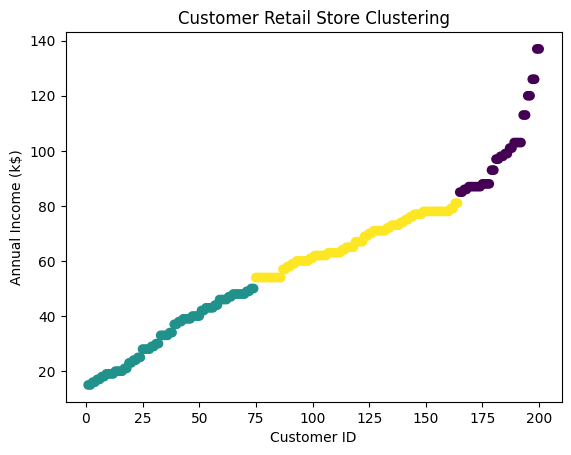

In [25]:
# Visualization of clusters
plt.scatter(data['CustomerID'], data['Annual Income (k$)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Customer ID')
plt.ylabel('Annual Income (k$)')
plt.title('Customer Retail Store Clustering')
plt.show()